# Notebook 27: Mohr Circle for stress in 3D

The Mohr Circle for stress results from a rotation about one of the principal axes of the stress tensor. Thus in 3D, the Mohr Circle for stress consists of three circles, each one describing the rotation about one of the principal stresses.

# Python functions

We can use the [shear_on_plane](../functions/shear_on_plane.py) function from [notebook 26](nb26_tractions_on_plane.ipynb) to draw the Mohr Circle in three-dimensions. Here it is important to determine the sense of the shear traction. Anti-clockwise shear is positive, and clockwise shear is negative. The function [mohr_circle_stress](../functions/mohr_circle_stress.py) draws the Mohr circle for stress in three-dimensions for a given stress tensor and stress coordinate system. It also plots and outputs the normal and maximum shear tractions on a group of input planes.

## Application

Let's solve the following problem: $\sigma_1$, $\sigma_2$, and $\sigma_3$ are 50, 30, and 10 MPa, respectively. $\sigma_1$ is horizontal and trends E-W, while $\sigma_3$ is vertical. Plot the Mohr circle (in 3D), and the tractions on planes with orientations(strike and dip, RHR): 000/30, 000/45, 000/60, 180/30, 180/45, 180/60, 045/30, 045/45,
045/60, 135/30, 135/45 and 135/60.

id	Strike	Dip	σ	Trend	Plunge	τ	Trend	Plunge
1	0.0	30.0	20.00	270.0	60.0	17.32	270.0	-30.0
2	0.0	45.0	30.00	270.0	45.0	20.00	270.0	-45.0
3	0.0	60.0	40.00	270.0	30.0	17.32	270.0	-60.0
4	180.0	30.0	20.00	90.0	60.0	-17.32	90.0	-30.0
5	180.0	45.0	30.00	90.0	45.0	-20.00	90.0	-45.0
6	180.0	60.0	40.00	90.0	30.0	-17.32	90.0	-60.0
7	45.0	30.0	17.50	315.0	60.0	-13.92	291.0	-27.8
8	45.0	45.0	25.00	315.0	45.0	-16.58	281.3	-39.8
9	45.0	60.0	32.50	315.0	30.0	-15.61	261.9	-46.1
10	135.0	30.0	17.50	45.0	60.0	13.92	69.0	-27.8
11	135.0	45.0	25.00	45.0	45.0	16.58	78.7	-39.8
12	135.0	60.0	32.50	45.0	30.0	15.61	98.1	-46.1


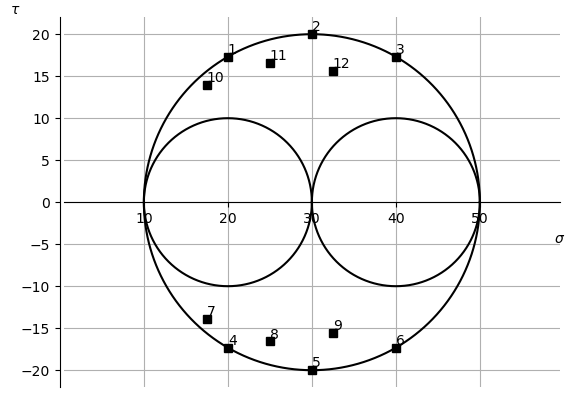

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# this makes visible our functions folder
import sys, os
sys.path.append(os.path.abspath(os.path.join("..", "functions")))

# import mohr_circle_stress function
from mohr_circle_stress import mohr_circle_stress

# stress tensor in principal stress coordinate system
stress = np.array([[50, 0, 0],[ 0, 30, 0],[ 0, 0, 10]])

# trend and plunge of sigma1, and trend of sigma3
tx1, px1, tx3 = np.radians([90, 0, 90])

# planes
planes = np.zeros((12,2))
# strikes in degrees
planes[0:3,0] = 0
planes[3:6,0] = 180
planes[6:9,0] = 45
planes[9:12,0] = 135
# dips in degrees
planes[0:12:3,1] = 30
planes[1:12:3,1] = 45
planes[2:12:3,1] = 60

# convert to radians
planes = planes * np.pi/180
 
# plot Mohr circle
fig, ax = plt.subplots()
ns,ons = mohr_circle_stress(stress,tx1,px1,tx3,planes,ax)
for i in range(np.size(ns,0)):
    ax.text(ns[i,0],ns[i,1],f"{i+1}",color="black",va='bottom')

# print normal and shear tractions
print("id", "Strike","Dip","\u03C3","Trend","Plunge","\u03C4",
      "Trend","Plunge",sep="\t")

# return to degrees
planes = planes * 180/np.pi
ons = ons * 180/np.pi
# print
for i in range(0,np.size(planes,0)):
    print(f"{i+1}", f"{planes[i,0]:.1f}",f"{planes[i,1]:.1f}",
          f"{ns[i,0]:.2f}",f"{ons[i,0]:.1f}",
          f"{ons[i,1]:.1f}",f"{ns[i,1]:.2f}",
          f"{ons[i,2]:.1f}",f"{ons[i,3]:.1f}",sep="\t")
    
# show the plot
plt.show()